项目介绍
所谓探索性数据分析(Exploratory Data Analysis，以下简称EDA)，是指对已有的数据(特别是调查或观察得来的原始数据)在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。特别是当我们对这些数据中的信息没有足够的经验，不知道该用何种传统统计方法进行分析时，探索性数据分析就会非常有效。探索性数据分析在上世纪六十年代被提出，其方法由美国著名统计学家约翰·图基(John Tukey)命名。

本项目需解决的问题

本项目分析P2P平台Lending Club的贷款数据，探索数据分析过程中，并尝试回答以下3个问题：

利率与风险成正比，风险越高，利率越高，违约的可能线性越大，从P2P平台的数据来看，影响风险的因素有哪些？（为后续建模做准备）
了解P2P平台的业务特点、产品类型、资产质量、风险定价？
有什么建议？

分析思路
我们可以将信贷信息分为信贷硬信息和信贷软信息。
任何可以量化客户的还款能力的信息均可以用作硬信息，可勾勒客户还款意愿的信息则为软信息。
信贷硬信息： 站在企业的角度，硬信息主要包括财务三大报表（资产负债表、利润表和现金流量表）以及信贷记录；站在个人角度硬信息主要包括：个人年收入 、资产状况（借款是否拥有房产、车或理财产品）。
信贷软信息： 过往的信贷记录比较直接了解客户的还款意愿，以往发生违约次数较多的客户再次发生违约的概率相比其他客户大。客户的学历、年龄、目前工作所在单位的级别和性别等信息也可作为软信息。
因此，我们主要围绕着“客户是否具有偿还能力，是否具有偿还意愿”展开探索分析。



项目背景
作为旧金山的一家个人对个人的借贷公司，Lending Club成立于2006年。他们是第一家注册为按照美国证券交易委员会SEC(Securities and Exchange Commission)的安全标准向个人提供个人贷款的借贷公司。与传统借贷机构最大的不同是，Lending Club利用网络技术打造的这个交易平台，直接连接了个人投资者和个人借贷者，通过此种方式，缩短了资金流通的环节，尤其是绕过了传统的大银行等金融机构，使得投资者和借贷者都能得到更多实惠、更快捷。对于投资者来说可以获得更好的回报，而对于借贷者来说，则可以获得相对较低的贷款利率。

In [1]:
# Pandas
import pandas as pd

# numpy,matplotlib,seaborn,pyecharts
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pyecharts.charts import Pie

#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore') 

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
data = pd.read_csv(r'Loan.csv')

探索分析数据（EDA）
一旦获得了数据，下一步就是检查和探索他们。在这个阶段，主要的目标是合理地检查数据。例如：如果数据有唯一的标记符，是否真的只有一个；数据是什么类型，检查最极端的情况。他们是否有意义，有什么需要删除的吗？数据应该怎么调整才能适用于接下来的分析和挖掘？此外，数据集还有可能存在异常值。同时，我将会通过对数据进行简单的统计测试，并将其可视化。 检查和探索数据的过程非常关键。因为下一步需要清洗和准备处理这些数据，只有进入模型的数据质量是好的，才能构建好的模型。（避免Garbage in, Garbage out）

首先预览基本内容，Pandas为我们提供很多可以方便查看和检查数数据的方法，有df.head(n)、df.tail(n)、df.shape()、http://df.info() 等 。

查看表格的行数和列数

In [3]:
data.shape 

(2260668, 145)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.iloc[0] #取矩阵当中第一行样本

id                          NaN
member_id                   NaN
loan_amnt                  2500
funded_amnt                2500
funded_amnt_inv          2500.0
                          ...  
settlement_status           NaN
settlement_date             NaN
settlement_amount           NaN
settlement_percentage       NaN
settlement_term             NaN
Name: 0, Length: 145, dtype: object

处理缺失值

In [6]:
def not_null_count(column):
    column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = data.apply(not_null_count)  
print (column_null_count)

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64


In [7]:
half_count = len(data)/2 # 设定阀值
data = data.dropna(thresh = half_count, axis = 1 ) #若某一列数据缺失的数量超过阀值就会被删除
#data = data.drop(['desc', 'url'], axis = 1) # 删除某些加载了网址的url 和 描述的列
data.to_csv(r'loans.csv', index = False) # 将预处理后的数据转化为csv

In [8]:
loans = pd.read_csv('loans.csv')
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [9]:
loans.shape

(2260668, 101)

In [10]:
loans.dtypes  # 查看数据类型 

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
                               ...   
total_bc_limit                float64
total_il_high_credit_limit    float64
hardship_flag                  object
disbursement_method            object
debt_settlement_flag           object
Length: 101, dtype: object

In [11]:
loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260638e+06,2.260639e+06,...,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,1.882420e+01,3.068792e-01,5.768354e-01,1.161240e+01,...,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,1.418333e+01,8.672303e-01,8.859632e-01,5.640861e+00,...,4.935732e-01,1.830711e+00,9.036140e+00,3.621616e+01,3.646130e-01,3.775338e-01,1.815748e+05,4.991124e+04,2.300656e+04,4.507298e+04
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,0.000000e+00,8.000000e+00,...,0.000000e+00,1.000000e+00,9.130000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.073100e+04,2.089200e+04,8.300000e+03,1.500000e+04
50%,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,0.000000e+00,1.100000e+01,...,0.000000e+00,2.000000e+00,1.000000e+02,3.750000e+01,0.000000e+00,0.000000e+00,1.142985e+05,3.786400e+04,1.630000e+04,3.269600e+04
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,1.000000e+00,1.400000e+01,...,0.000000e+00,3.000000e+00,1.000000e+02,7.140000e+01,0.000000e+00,0.000000e+00,2.577550e+05,6.435000e+04,3.030000e+04,5.880425e+04
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,3.300000e+01,1.010000e+02,...,5.800000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.569000e+06,2.118996e+06


Pandas的describe()不能统计数据类型为object的属性，部分数据int_rate和emp_length数据类型都是object，稍后分析数据时需将它们转化为类型为floate的数字类型。

数据集的属性较多，我们初步聚焦几个重要特征展开分析，特别是我们最关心的属性贷款状态。

In [12]:
used_col = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status','purpose', 'annual_inc', 'emp_length'] # 贷款金额、贷款期限、贷款利率、信用评级、业务发生时间、业务发生所在州、贷款状态、贷款用途
used_data = loans[used_col]

In [13]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
0,2500,36 months,13.56,C,Dec-2018,NY,Current,debt_consolidation,55000.0,10+ years
1,30000,60 months,18.94,D,Dec-2018,LA,Current,debt_consolidation,90000.0,10+ years
2,5000,36 months,17.97,D,Dec-2018,MI,Current,debt_consolidation,59280.0,6 years
3,4000,36 months,18.94,D,Dec-2018,WA,Current,debt_consolidation,92000.0,10+ years
4,30000,60 months,16.14,C,Dec-2018,MD,Current,debt_consolidation,57250.0,10+ years


In [14]:
def not_null_count(column):
    column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = used_data.apply(not_null_count)  
print (column_null_count)

loan_amnt           0
term                0
int_rate            0
grade               0
issue_d             0
addr_state          0
loan_status         0
purpose             0
annual_inc          4
emp_length     146907
dtype: int64


单变量分析

1.贷款状态分布

为了更方便分析，我们将贷款状态进行分类变量编码，主要将贷款状态分为正常和违约

In [15]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(used_data["loan_status"])

used_data["Loan_Status_Coded"] = coding(used_data["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1})

print( '\nAfter Coding:')

pd.value_counts(used_data["Loan_Status_Coded"])


After Coding:


0                                                      1961647
1                                                       296241
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: Loan_Status_Coded, dtype: int64

In [16]:
[i for i in pd.value_counts(used_data['Loan_Status_Coded'])]

[1961647, 296241, 1988, 761, 31]

([<matplotlib.patches.Wedge at 0x25c97ac5720>,
 [Text(-1.0063875279349195, 0.4440542124752809, ''),
  Text(1.0046645609188392, -0.4479387458500954, ''),
  Text(1.0999864490186586, -0.005460034370030217, ''),
  Text(1.0999992808585304, -0.0012578198265789087, ''),
  Text(1.0999999989901035, -4.713568109077069e-05, '')])

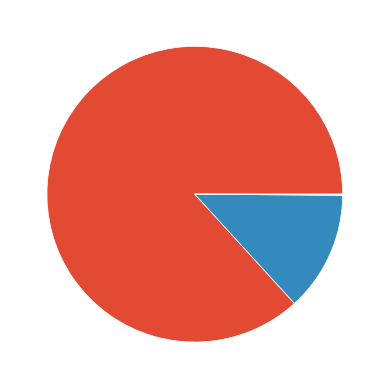

In [17]:
plt.pie([i for i in pd.value_counts(used_data['Loan_Status_Coded'])])

从图中可以看出，平台贷款发生违约的数量占少数。贷款状态为正常的有1961647个，贷款正常状态占比为86.77%。

2.贷款金额分布

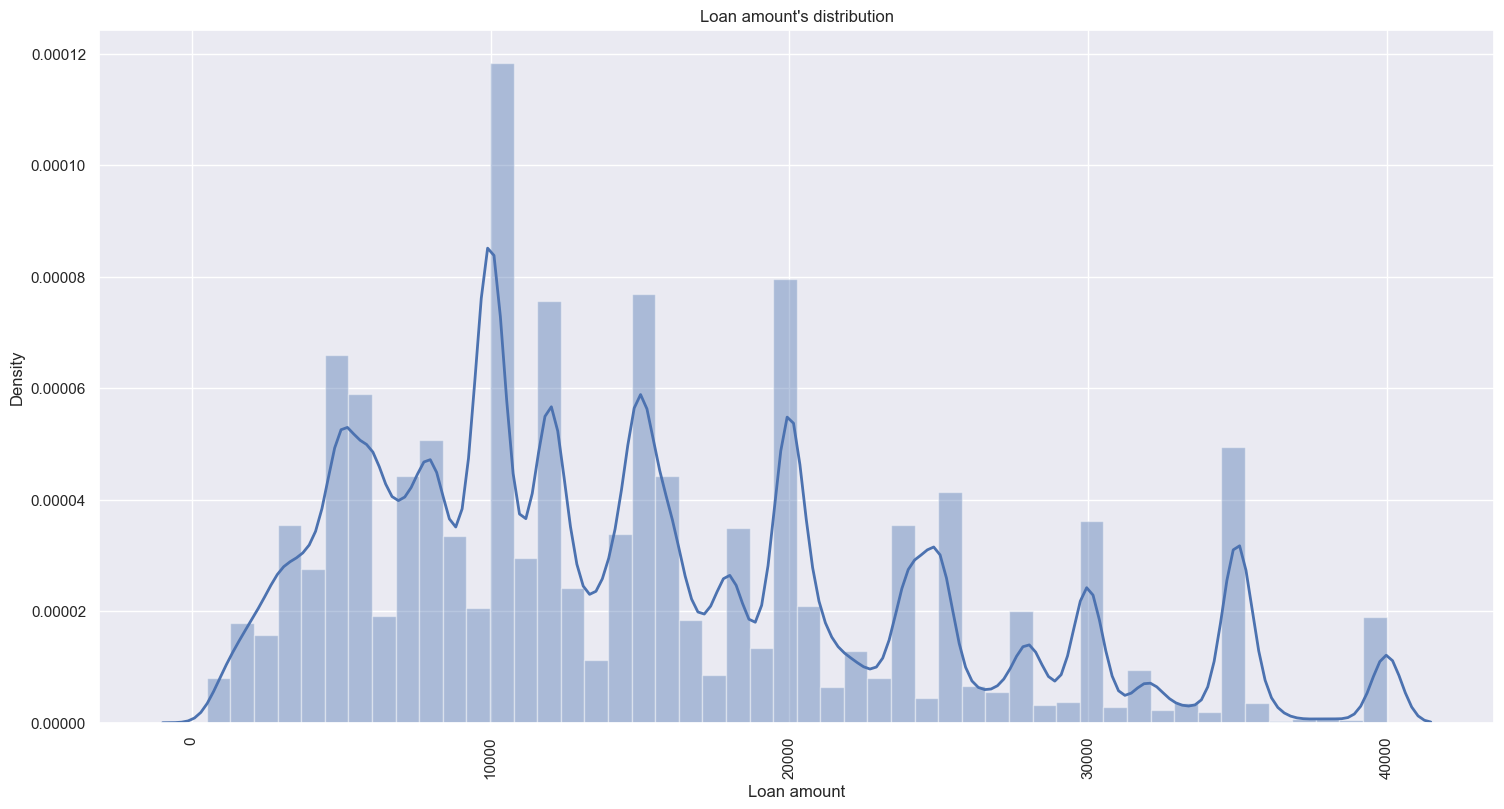

In [18]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(used_data['loan_amnt'] )
plt.xticks(rotation=90)
plt.xlabel('Loan amount')
plt.title('Loan amount\'s distribution')
sdisplot_loan.figure.savefig("Loan_amount")

平台贷款呈现右偏正态分布，贷款金额最小值为10,000美元，最大值为40,000美元，贷款金额主要集中在10,000美元左右，中位数为12,000美元，可以看出平台业务主要以小额贷款为主。贷款金额越大风险越大。

3.贷款期限分布

In [19]:
pd.value_counts(loans["term"])  # 分类统计贷款期限

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

([<matplotlib.patches.Wedge at 0x25c8e28c550>,
 [Text(-0.6798358932177176, 0.8647676903613295, ''),
  Text(0.6798358932177179, -0.8647676903613293, '')])

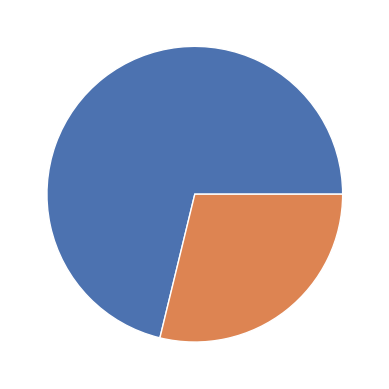

In [20]:
plt.pie([i for i in pd.value_counts(loans["term"])])

平台贷款产品期限分为36个月和60个月两种，其中贷款期限为60个月的贷款占比较小，贷款期限为36个月的贷款占比较大。一般来说贷款期限越长，不确定性越大，违约的可能性更大，期限较长的贷款产品风险越高 。从期限角度看，平台风险偏小的资产占大部分。

4.贷款产品用途种类比较

In [21]:
used_data['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

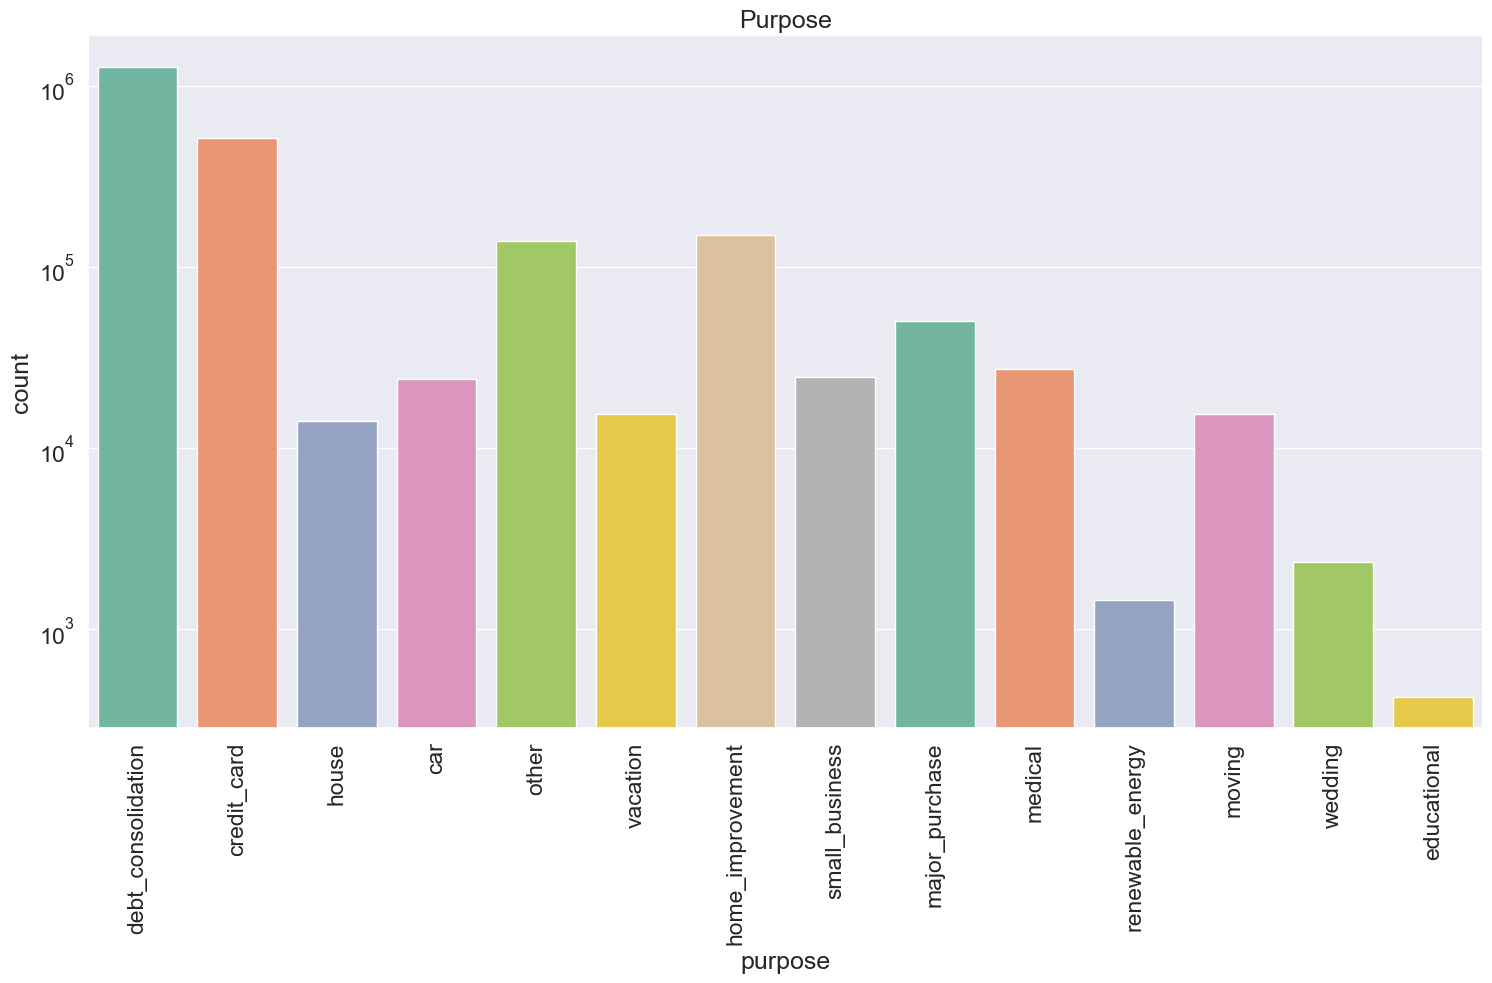

In [22]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
total = float(len(loans.index))
ax = sns.countplot(x="purpose", data=used_data, palette="Set2")
ax.set(yscale = "log")
plt.xticks(rotation=90)
plt.title('Purpose')
plt.show()
ax.figure.savefig("Purpose")

P2P平台贷款用途最多的为债务重组（借新债还旧债），其次是信用卡还款，第三是住房改善。一般来说，贷款用途为债务重组和信用卡还款的客户现金流较为紧张，此类客户也是在传统银行渠道无法贷款才转来P2P平台贷款，这部分客户的偿还贷款能力较弱，发生违约的可能性较高。还有部分贷款用途为Other的贷款，需要通过其他维度来分析其风险。

5.客户信用等级占比

In [23]:
used_data['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

([<matplotlib.patches.Wedge at 0x25c8e3e70a0>,
 [Text(0.6645381057025822, 0.8765780661579571, ''),
  Text(-1.0157299424838262, 0.4222471834622503, ''),
  Text(-0.48798981553895737, -0.985832612531283, ''),
  Text(0.6147077741288226, -0.9122139839015782, ''),
  Text(1.0375828899023603, -0.3652694164337701, ''),
  Text(1.095357425591546, -0.10095598150412581, ''),
  Text(1.0998427406953315, -0.018599616656851285, '')])

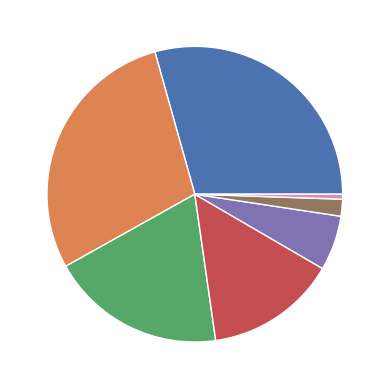

In [24]:
plt.pie([float(i) for i in pd.value_counts(loans["grade"])])

Lending Club平台对客户的信用等级分7类，A~G，信用等级为A的客户信用评分最高，信用等级为G的客户最低，信用等级的客户发生违约的可能性更低。目前，平台客户信用等级占比较多的客户为C类，其次是B类和A类，可以看出Lending Club授信部门对申请人的资信情况把关较严。

6.贷款利率种类分布

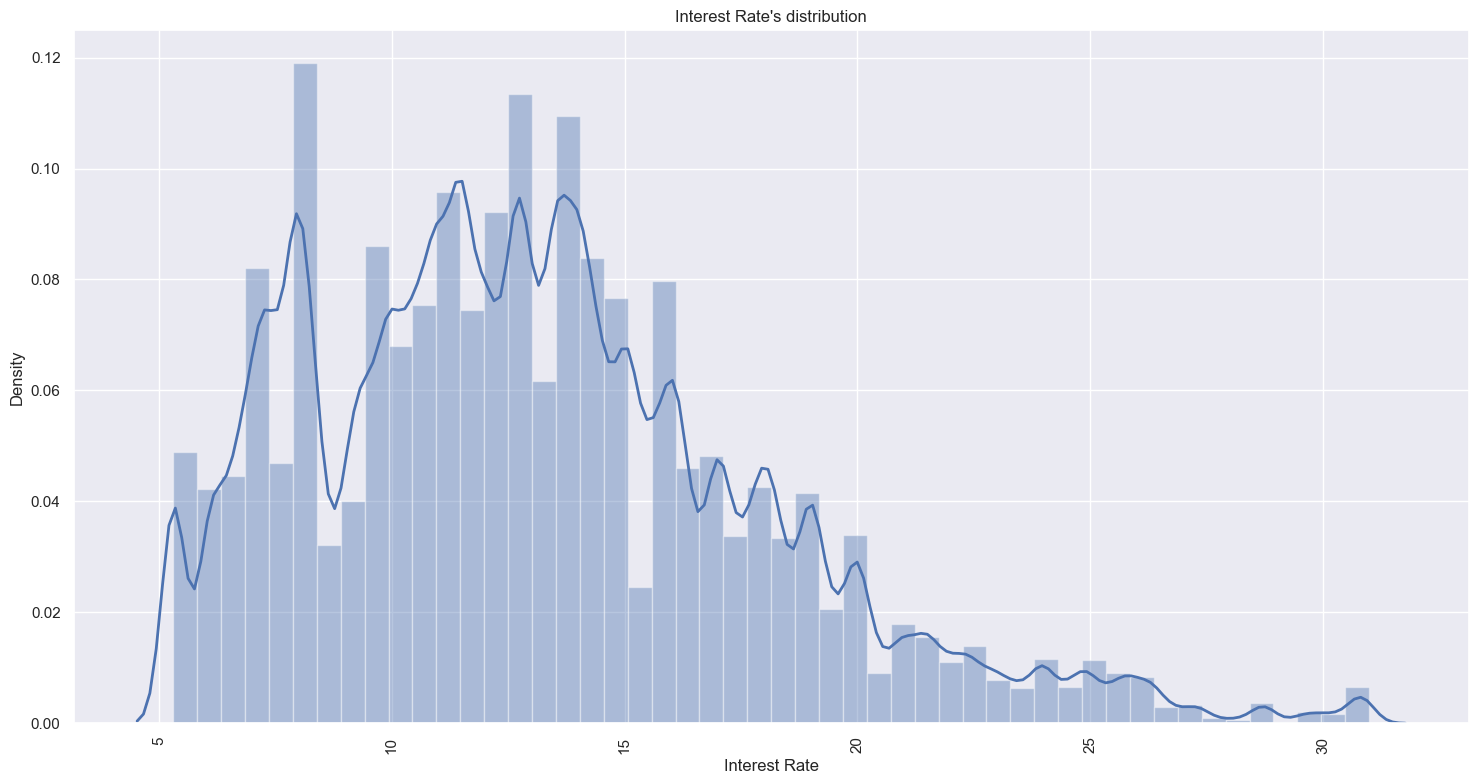

In [25]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(used_data['int_rate'] )
plt.xticks(rotation=90)
plt.xlabel('Interest Rate')
plt.title('Interest Rate\'s distribution')
sdisplot_loan.figure.savefig("Interest Rate")

Lending Club平台贷款利率呈现右偏正态分布，利率是资金的价格，利率越高，借款人借贷成本越高，借款人违约的可能性越高。

多维变量分析

1.探索贷款与时间的关系

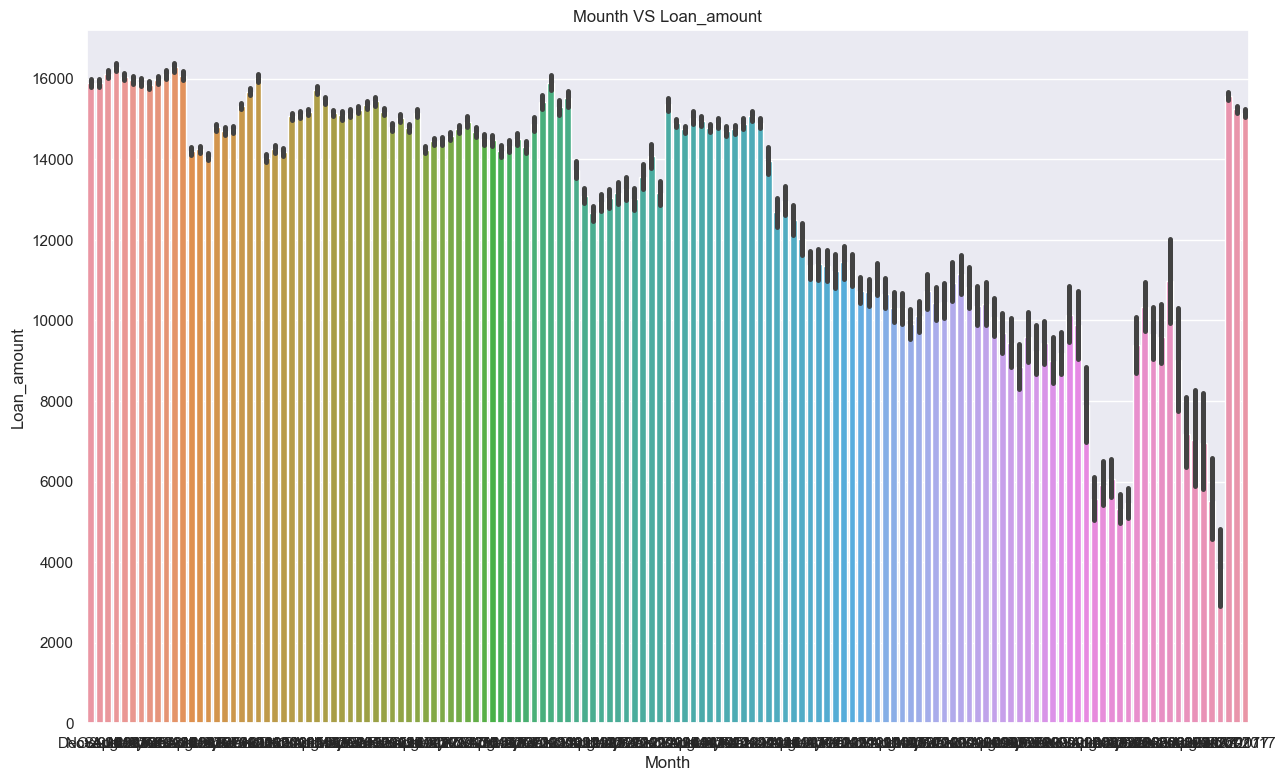

In [26]:
plt.figure(figsize=(15, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2})
plot1 = sns.barplot(x='issue_d', y= 'loan_amnt', data = used_data)
plt.xlabel('Month')
plt.ylabel('Loan_amount')
plt.title('Mounth VS Loan_amount')
plot1.figure.savefig("Mounth VS Loan_amount.png")

2.探索贷款金额与州之间的关系

In [27]:
data_group_by_state = used_data.groupby(['addr_state'])['loan_amnt'].sum() # 按州统计贷款金额
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe

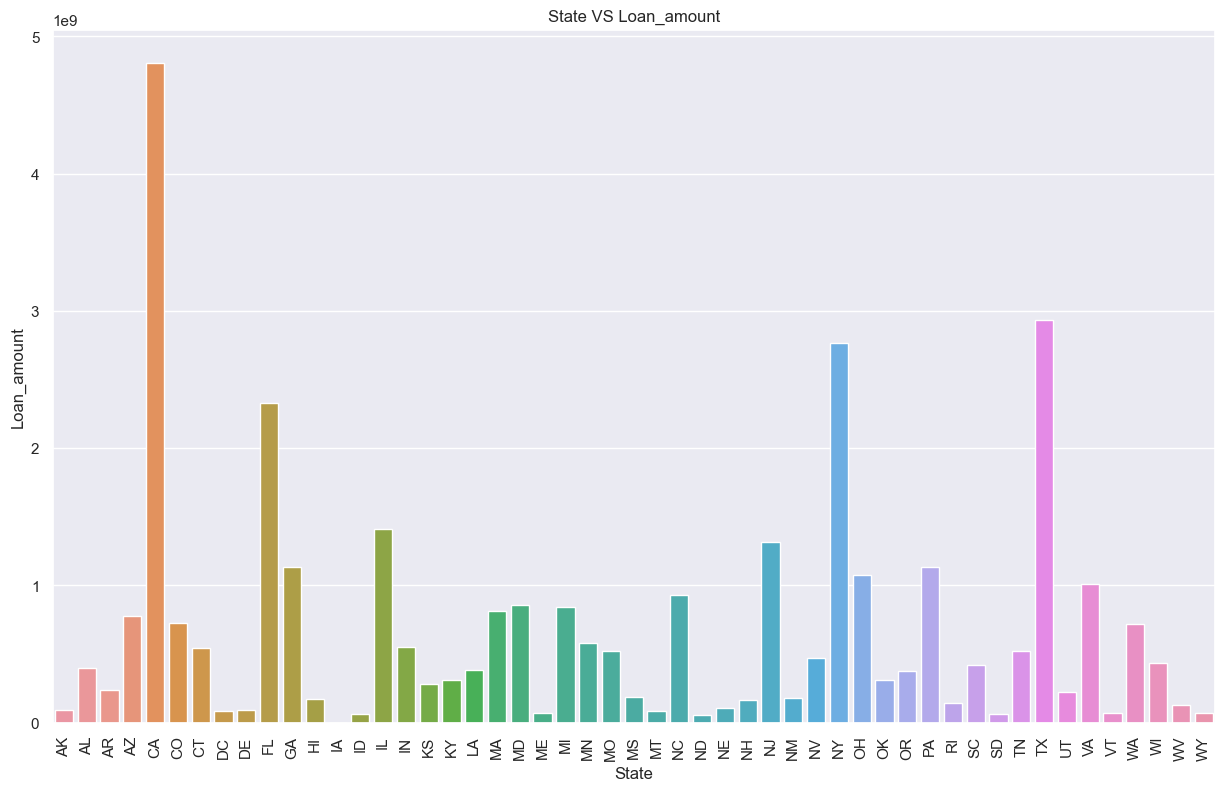

In [28]:
sns.set()
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='loan_amnt' , x='addr_state' , data=data_group_by_state_df )
plt.xlabel('State')
plt.ylabel('Loan_amount')
plt.xticks(rotation=90)
plt.title('State VS Loan_amount')
sbarplot.figure.savefig("State VS Loan_amount")

得知Lending Club 的总部在加州，因此加州的市场开拓也相对其他较好。其次是德克萨斯州和纽约州。

同时，从风险防范角度来看，应重点审核这几个城市贷款申请人的基本信息。

3.探索信用评级、贷款期限和利率的关系

In [29]:
data_group_by_grade_term = used_data.groupby(['grade', 'term'])['int_rate'].mean()
data_group_by_grade_term_df = pd.DataFrame(data_group_by_grade_term).reset_index()
data_group_by_grade_term_pivot = data_group_by_grade_term_df.pivot(index='grade', columns='term', values='int_rate')
data_group_by_grade_term_pivot  #  输出数据透视表

term,36 months,60 months
grade,,
A,7.055749,7.578898
B,10.670096,10.699614
C,14.069177,14.279886
D,18.089273,18.214278
E,22.045491,21.700762
F,25.366238,25.477381
G,28.018516,28.085895


In [30]:
used_data['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

从表格可以看出，P2P平台的利率最高档为30%，而利率最低档为7%左右，总体利率水平也相对传统银行较高。 信用评级从A到G，A的的借款人信用评分最高，财务状况较好，违约发生的可能性较低，因此利率也相对较低。

贷款期限长意味着不确定性增加，风险也随之增加，期限较长的贷款在同信用等级下的借款利率也相对高。

4.探索贷款用途与利率的关系

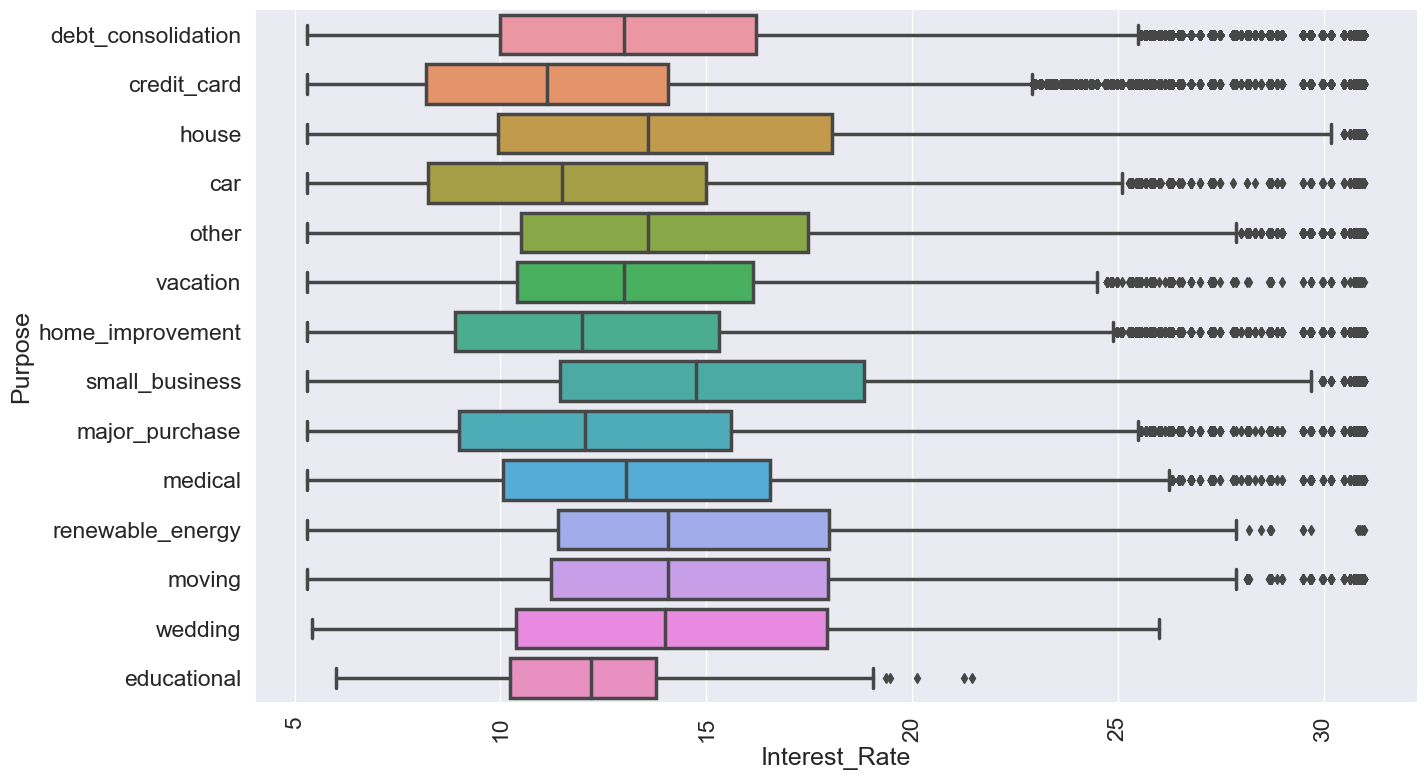

In [31]:
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sboxplot = sns.boxplot(y="purpose", x="int_rate", data=loans)
sns.despine(top=True)
plt.xlabel('Interest_Rate')
plt.ylabel('Purpose')
plt.xticks(rotation=90)
plt.show()
sboxplot.figure.savefig("Purpose VS Rate")


贷款用途分别为house、small_business以及Other的贷款利率较高。其中贷款用途为house的贷款利率为最高。


5.探索贷款利率与违约次数之间的关系

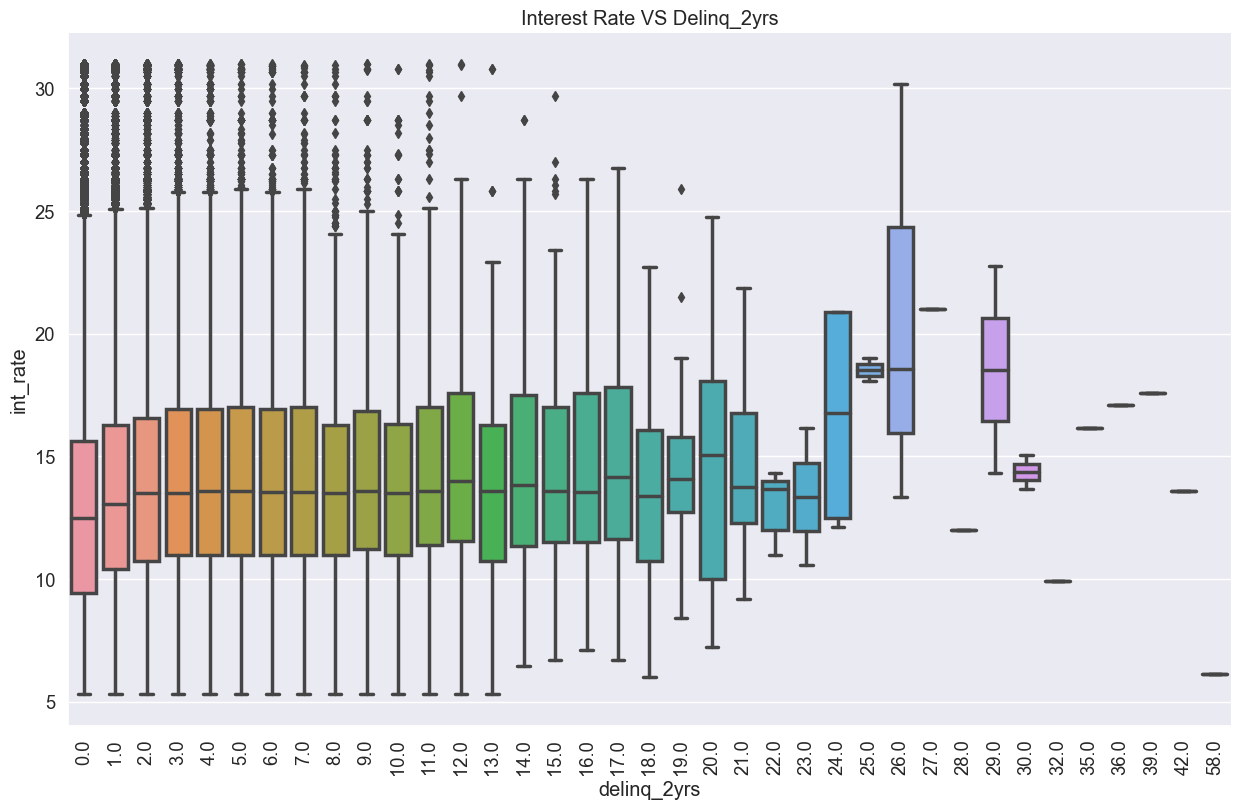

In [32]:
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sboxplot2 = sns.boxplot(x="delinq_2yrs", y="int_rate", data=loans)
sns.despine(top=True)
plt.xticks(rotation=90)
plt.title('Interest Rate VS Delinq_2yrs')
sboxplot2.figure.savefig("Interest Rate VS Delinq_2yrs")

违约次数越多的人意味着自身财务状况较差，偿付能力也较低，因此此类客户贷款风险越高，对此部分资产应给予更高的利率定价。

总结

In [37]:
used_data.corr()

,loan_amnt,int_rate,annual_inc,emp_length
loan_amnt,1.000000,0.098083,0.197246,0.079211
int_rate,0.098083,1.000000,-0.050585,-0.009868
annual_inc,0.197246,-0.050585,1.000000,0.044041
emp_length,0.079211,-0.009868,0.044041,1.000000


<Figure size 1900x900 with 0 Axes>

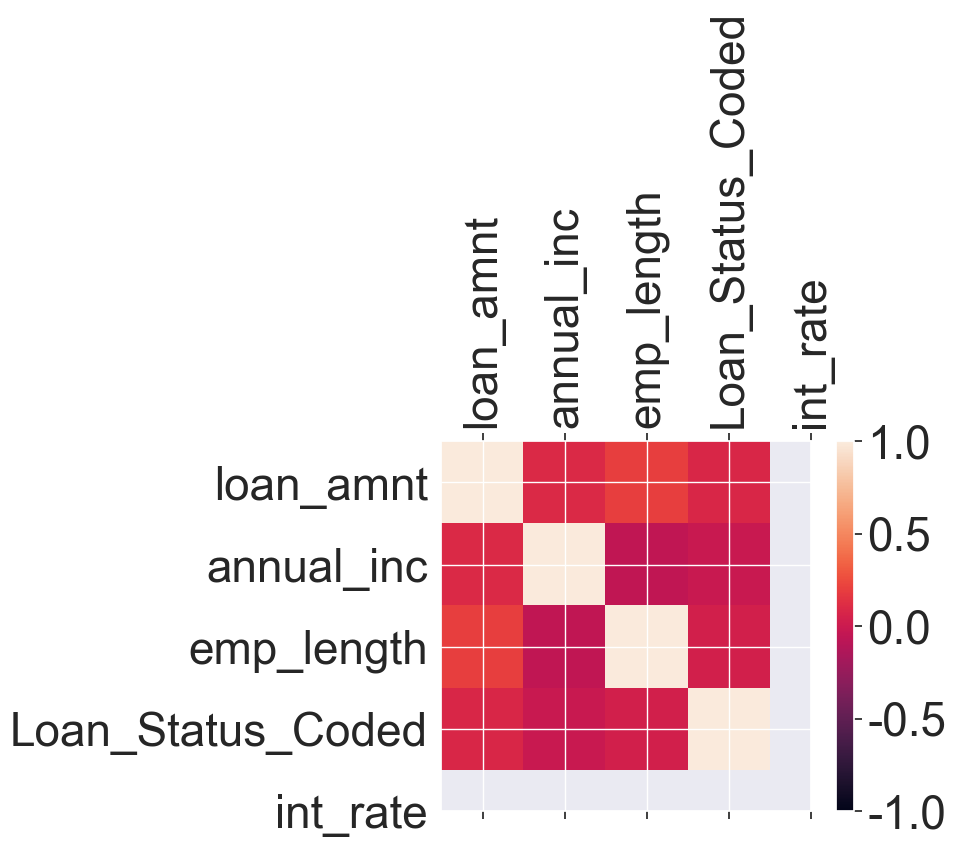

In [38]:
# 相关系数图
names = ['loan_amnt', 'annual_inc' ,'emp_length', 'Loan_Status_Coded','int_rate' ] #设置变量名
correlations = used_data.corr()
# plot correlation matrix
plt.figure(figsize=(19, 9))
fig = plt.figure() #调用figure创建一个绘图对象
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,5,1) #生成0-5，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.xticks(rotation=90)
fig.savefig("Corr")
plt.show()

1.影响风险的因素

分析企业偿债能力主要考察企业的资产状况和经营情况，只有负债结构与企业盈利能力合理匹配，企业才能持续稳定地发展。

个人的资产状况好比企业的资产负债表，个人收入犹如企业的利润表或现金流量表。高收入的客户意味着有良好的现金流，偿还债务能力较高，违约的可能性较低，一般来说此类客户的信用评级也相对较高，平台对应的贷款资产风险也相对较低；个人过往的信用记录能够反映客户的偿还意愿，长期有不良信用记录的客户再次发生违约的可能性也较高，为对违约风险，对此类客户应匹配更高的利率定价。

2.Lending Club 平台特点

平台业务持续稳定发展：第二季度业务持续增长，平台业务主要集中于加州、德克萨斯州和纽约州。
平台贷款金额以 小额贷款为主，贷款金额主要集中在10,000美元左右，小而散的贷款金额能够很好的分散资金风险。
平台贷款利率较高，贷款利率相对传统金融机构较高。
平台二季度违约风险得到良好的控制，平台贷款发生违约的数量较少，贷款正常状态占比为86.77%。

3.个人建议

完善客户画像和产品设计：信贷业务开展前，首先要明确信贷机构的目标客户群、目标客户的特征和画像信息是什么。例如Lending Club平台的small business业务，中小企业目标群体的特征描述应包括能够反映企业的资产负债和现金流相关的财务报表信息或表外债务信息等。完整的客户信息有利于风控人员和系统分析把控违约风险。

优化贷款模型：完善客户信息的同时，借助机器学习的技术持续优化贷款模型。
